Задача: подобрать открытые библиотеки по распознаванию документов и провести распознавания паспортов с указанной ссылки:
https://disk.yandex.ru/d/kVdTaY8TuGvBkw

через pytesseract

In [4]:
!pip install matplotlib

  Using cached matplotlib-3.6.3-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl (160 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)


In [2]:
!pip install opencv-python
!pip install pytesseract
!pip install easyocr

  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached numpy-1.24.1-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)
  Using cached Pillow-9.4.0-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached easyocr-1.6.2-py3-none-any.whl (2.9 MB)
  Using cached opencv_python_headless-4.5.4.60-cp39-cp39-win_amd64.whl (35.0 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached scipy-1.10.0-cp39-cp39-win_amd64.whl (42.5 MB)
  Using cached torchvision-0.14.1-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached scikit_image-0.19.3-cp39-cp39-win_amd64.whl (12.1 MB)
  Using cached ninja-1.11.1-py2.py3-none-win_amd64.whl (313 kB)
  Using cached shapely-2.0.1-cp39-cp39-win_amd64.whl (1.4 MB)
  Using cached pyclipper-1.3.0.post4-cp39-cp39-win_amd64.whl (95 kB)
  Using cached torch-1.13.1-cp39-cp39-win_amd64.whl (162.5 MB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached tifffile-2023.1.23.1-py

In [5]:
from PIL import Image
from pytesseract import pytesseract
from skimage import io
import matplotlib.pyplot as plt
import cv2
import easyocr
import os

In [6]:
# Настройка tesseract 
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.tesseract_cmd = path_to_tesseract
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata"'

In [7]:
# Данные предварительно скачаны в директорию DataForOCR
docs_path = 'DataForOCR/'
docs = os.listdir(docs_path)
docs

['0.jpeg',
 '1.jpeg',
 '2.jpeg',
 '3.jpeg',
 '4.png',
 '5.jpeg',
 '6.jpeg',
 '7.jpeg',
 '8.jpeg',
 '9.jpeg']

In [8]:
pp = docs_path + docs[0]
pp

'DataForOCR/0.jpeg'

In [9]:
reader = easyocr.Reader(['ru'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
result = reader.readtext(pp)


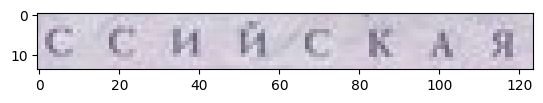

In [11]:
image = cv2.imread(pp)
ii = image[31:45, 101 :225]
plt.imshow(ii, cmap='gray')

In [14]:
result[0][0]

[[101, 31], [225, 31], [225, 45], [101, 45]]

In [5]:
# Создадим функцию для распознавания
def ocr_pytesseract(img):
    image = Image.open(img)
    text = pytesseract.image_to_string(image, lang= 'rus', config=tessdata_dir_config)
    return text

In [ ]:
pytesseract.image_to_string(image, lang= 'rus')

In [6]:
# Распознавание текста
pasp_texts = {}
for doc in docs:
    pasp_texts[doc] = ocr_pytesseract(docs_path+doc)

In [3]:
# В результате имеем следующий распознанный текст:
for doc,text in pasp_texts.items():
    print(f'{doc} : \n{text}')

NameError: name 'pasp_texts' is not defined